In [1]:
from scripts.read_data import load_dataset

In [2]:
df = load_dataset("Bank Customer Churn Prediction.csv")

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Checking For Missing Values

In [4]:
missing_values = df.isnull().sum()
print(missing_values)

customer_id         0
credit_score        0
country             0
gender              0
age                 0
tenure              0
balance             0
products_number     0
credit_card         0
active_member       0
estimated_salary    0
churn               0
dtype: int64


We can see that there are no missing values

### Summary Statistics
Understanding the distribution and charachteristics of the data
- Central tendency (Mean, Median, Mode)
- Dispresion (Standard deviation, Variance, Range)
- Percentiles (Min, Max, Quartiles)
- Skewness & Kurtosis

In [7]:
summ_statistics = df.describe()

summ_statistics

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


- High std in estimated_salary suggesting either extreme variation in these values or incorect formating.
- Distribution for credit score looks fine but we should check if few customers have very low credit scores which may contribute to churn.
- The age distributions looks realistic, max value 92 implies the presence of very old customers which might be interesting to analyze.
- Balance , min value 0 suggests the presence of customers that only keep accounts for transacations not savings, high std suggests a wide range of account balances.
- Churn , mean ~ 20% , the data set is imbalanced.
- products_number , likely most customers have 1 0r 2 products and very few have 3 or 4.

### Vizualizing Distributions

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
from scripts.save_utils import save_fig

<function matplotlib.pyplot.show(close=None, block=None)>

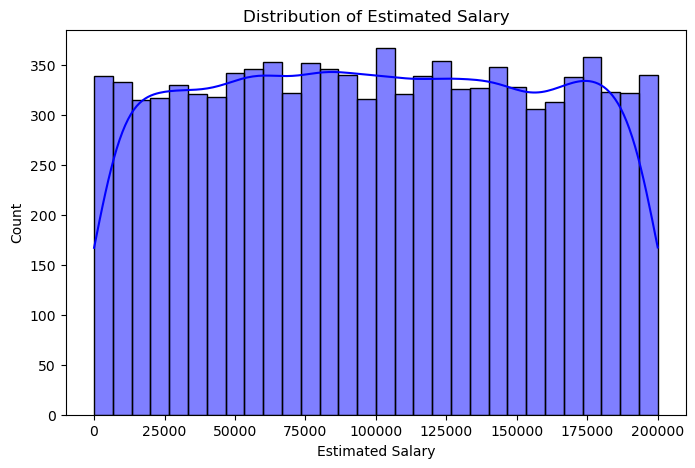

In [11]:
plt.figure(figsize=(8, 5)) 
sns.histplot(df['estimated_salary'], bins=30, kde=True, color='blue')
plt.xlabel('Estimated Salary')
plt.ylabel('Count')
plt.title('Distribution of Estimated Salary')
save_fig("eda-distribution-of-estimated-salary")
plt.show

- Distribution is almost unifrom across all salary ranges, salaries evenly spread. The graph confirms that the values are naturally spread.

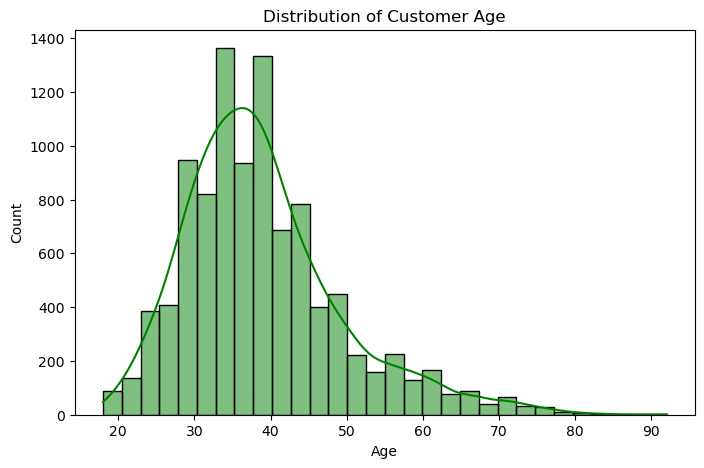

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], bins=30, kde=True, color='green')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Customer Age')
save_fig("eda-distribution-of-customer-age")
plt.show()

- distribution right-skewed
- bank has mostly young customers, maybe older ones are more likely to churn

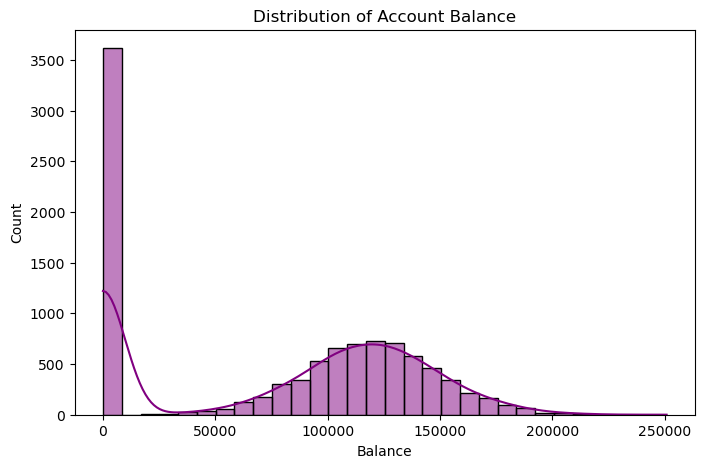

In [13]:
plt.figure(figsize=(8, 5))
sns.histplot(df['balance'], bins=30, kde=True, color='purple')
plt.xlabel('Balance')
plt.ylabel('Count')
plt.title('Distribution of Account Balance')
save_fig("eda-distribution-of-account-balance")
plt.show()

- we can see a spike at balance = 0 , meaning that a lot of customers have a balance 0 and do not keep money in their acc. Maybe this can be linked to the activity of customers and churners comparing balance distribution for churn bs non-churn.

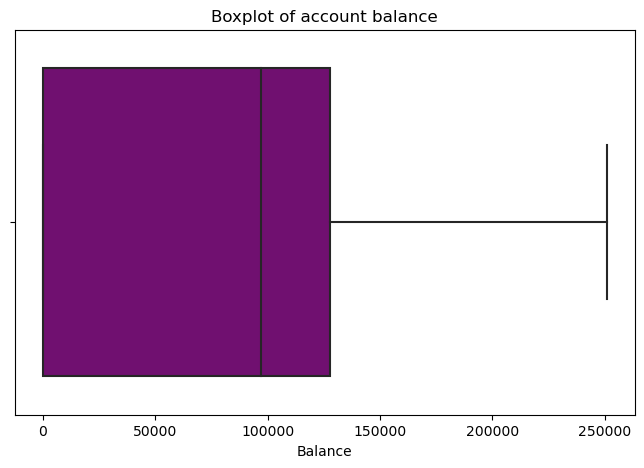

In [14]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df['balance'], color='purple')
plt.xlabel('Balance')
plt.title('Boxplot of account balance')
save_fig("eda-boxplot-of-account-balance")
plt.show()

- large spread
- high median (100000)
- spike at 0 confirms most do not keep money in their balance
- it would be good to analyze churn rates for customers with acc 0 and high balances


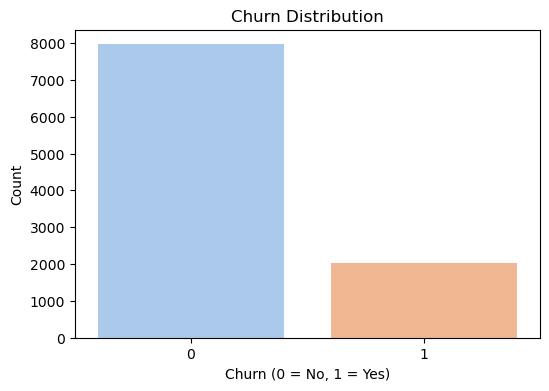

In [15]:
plt.figure(figsize=(6,4))
sns.countplot(x=df['churn'], palette='pastel')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Churn Distribution')
save_fig("eda-churn-distribution")
plt.show()

- imbalance should be handled

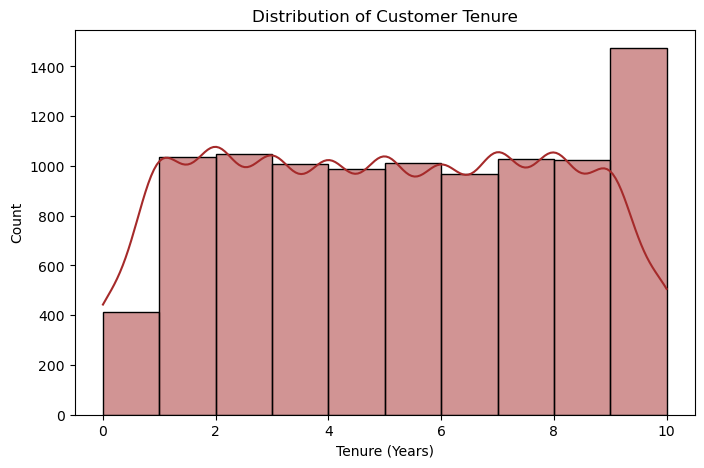

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df['tenure'], bins=10, kde=True, color='brown')
plt.xlabel('Tenure (Years)')
plt.ylabel('Count')
plt.title('Distribution of Customer Tenure')
save_fig("eda-distribution-of-tenure")
plt.show()

- evenly dist
- higher count at 10 years
- hyp: customers who stay longer are less likely to chunr (to be confirmed)

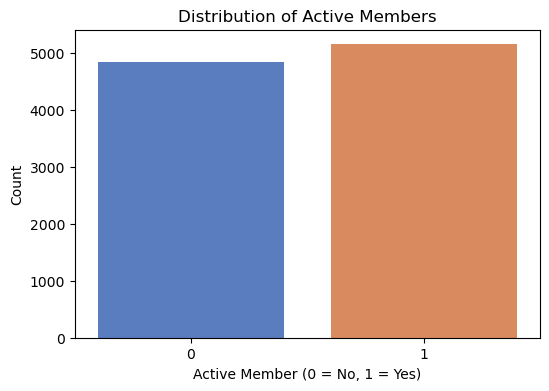

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['active_member'], palette='muted')
plt.xlabel('Active Member (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Active Members')
save_fig("eda-distribution-of-active-members")
plt.show()

- almost equal split ( 1 and 0 )
- we must check if inactive customers are likely to churn since they are almost equal to the active ones

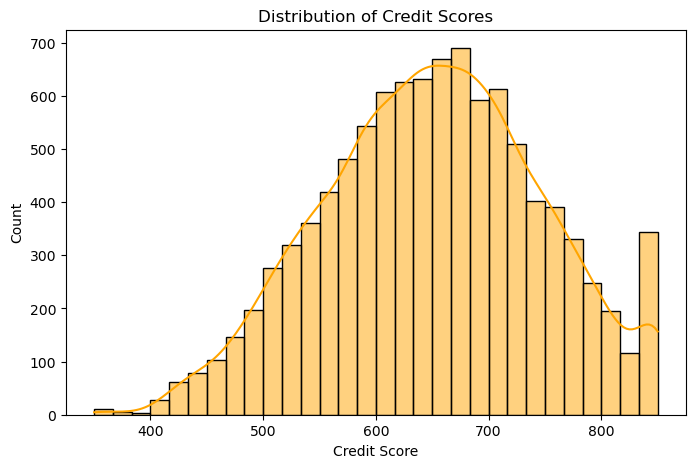

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['credit_score'], bins=30, kde=True, color='orange')
plt.xlabel('Credit Score')
plt.ylabel('Count')
plt.title('Distribution of Credit Scores')
save_fig("eda-distributioj-of-credit-scores")
plt.show()

- normal distributiion bell shapped (most custoemrs between 600 and 700)
- few have low scores <500  or very high >800
- low score customers might be more riskier to churb

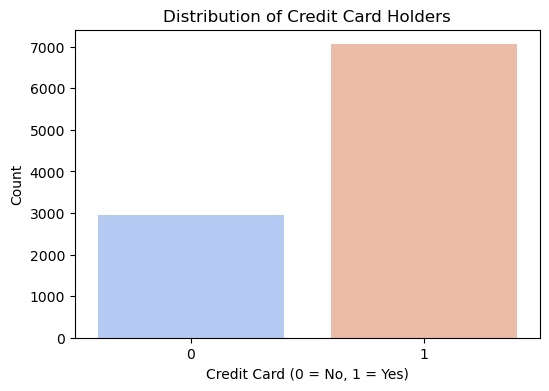

In [19]:
plt.figure(figsize=(6, 4))
sns.countplot(x=df['credit_card'], palette='coolwarm')
plt.xlabel('Credit Card (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.title('Distribution of Credit Card Holders')
save_fig("eda-distribution-of-credit-card-holders")
plt.show()

- maybe there is a relation between haveing a credit card and churning